
  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.07.09 08:29:21      +
  ++++++++++++++++++++++++++++++++++++++++++++
++++++ info: seqedit - number of elements installed:  3
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
       5.300000208                 -0     0.001640076788        24.69266184 

                q1                dq1            betxmax              dxmax 
     0.04173114611      -0.0418147272        23.04497488       0.8

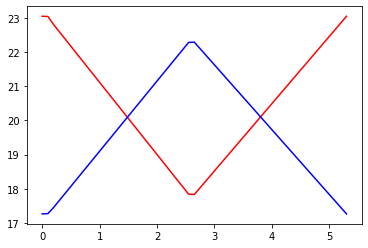

In [5]:
##Version that works
from cpymad.madx import Madx
import matplotlib.pyplot as plt
mqk, mql, length = 1.0, 0.1, 5.3

madx = Madx()
madx.beam(particle='proton', pc=1000)


madx.command.quadrupole.clone('QF', l=mql, k1=mqk)
madx.command.quadrupole.clone('QD', l=mql, k1=-mqk)
madx.command.rbend.clone('dip', l=0.1, angle=10e-3)


madx.command.sequence.clone('S1', l='{:10.6e}'.format(length))
madx.elements.marker.clone('s1start', at=0)
madx.command.endsequence()

madx.command.seqedit(sequence='S1')
madx.command.install(element='QF1', class_='QF', at='{:10.6e}'.format(mql/2))
madx.command.install(element='B1', class_='dip', at=mql+0.1/2)
madx.command.install(element='QD1', class_='QD', at='{:10.6e}'.format(length/2-mql/2))
madx.command.endedit()
 

madx.use(sequence='s1')
tw = madx.twiss().dframe()

fig, ax = plt.subplots()
ax.plot(tw['s'], tw['betx'], 'r-')
ax.plot(tw['s'], tw['bety'], 'b-')
plt.show()

In [9]:
from cpymad.madx import Madx
import matplotlib.pyplot as plt
mqk, mql, length = 1.0, 0.1, 5.3

madx = Madx()
madx = Madx(command_log="commandlog") #Writes the errors in this file once madx has quit
madx.options(verbose=True, echo=True, debug=True) # Ligne important pour débugger
madx.beam(particle='proton', pc=1000)


madx.command.quadrupole.clone('QF', l=mql, k1=mqk)
madx.command.quadrupole.clone('QD', l=mql, k1=-mqk)
madx.command.rbend.clone('dip', l=0.1, angle=10e-3)


madx.command.sequence.clone('S1', l='{:10.6e}'.format(length))
madx.elements.marker.clone('s1start', at=0)
madx.command.endsequence()

madx.command.seqedit(sequence='S1')
madx.command.install(element='QF1', class_='QF', at='{:10.6e}'.format(mql/2))
madx.command.install(element='B1', class_='dip', at=mql+0.1/2)
#madx.command.install(element='QD1', class_='QD', at='{:10.6e}'.format(length/2-mql/2))
madx.command.install(element='QD1', class_='QD', at='{:10.6e}'.format(length/2-mql/2+3)) #Ici on place l'élément hors de la séquence ce qui fait planter
madx.command.endedit()
 

madx.use(sequence='s1')
tw = madx.twiss().dframe()

fig, ax = plt.subplots()
ax.plot(tw['s'], tw['betx'], 'r-')
ax.plot(tw['s'], tw['bety'], 'b-')
plt.show()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.07.09 08:31:13      +
  ++++++++++++++++++++++++++++++++++++++++++++
   in get_node_pos: name: s1$start, pos: 0.000000e+00, fact: 0.000000e+00, length: 0.000000e+00, from_name: (null)
	 in get_node_pos: name: s1$start, from: 0.000000e+00			  ---> final pos: 0.000000e+00 
   in get_node_pos: name: s1start, pos: 0.000000e+00, fact: 0.000000e+00, length: 0.000000e+00, from_name: (null)
	 in get_node_pos: name: s1start, from: 0.000000e+00			  ---> final pos: 0.000000e+00 
   in get_node_pos: name: s1$end, pos: 5.300000e+00, fact: 0.000000e+00, length: 0.000000e+00, from_name: (null)
	 in get_node_pos: name: s1$end, from: 0.000000e+00			  ---> final pos: 5.300000e+00 
++++++ info: seqedit - number of elements installed:  3
++++++ info: seqedit - number of elements moved:      0
++

RuntimeError: MAD-X has stopped working!